***Import needed Libs***

In [1]:
import os
from PIL import Image
import itertools

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

print('Modules loaded successfully')

2024-10-28 17:30:29.465715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 17:30:29.465880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 17:30:29.610915: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Modules loaded successfully


### Preprocessing

***Read data and store it in dataframe***

In [2]:
import os
import pandas as pd

# Define the directory containing the dataset
data_dir = '/kaggle/input/multiclass-weather-dataset/Multi-class Weather Dataset'

# Initialize empty lists to store file paths and labels
filepaths = []
labels = []

# Get the list of folders in the dataset directory
folds = os.listdir(data_dir)
for fold in folds:
    # Construct the path to each folder
    foldpath = os.path.join(data_dir, fold)
    
    # Get the list of pictures in the current folder
    pics = os.listdir(foldpath)
    for pic in pics:
        # Construct the path to each picture
        pic_path = os.path.join(foldpath, pic)
        
        # Append the picture path and corresponding label to the lists
        filepaths.append(pic_path)
        labels.append(fold)

# Create a Pandas Series for file paths and labels
FSeries = pd.Series(filepaths, name='Pic Path')
LSeries = pd.Series(labels, name='Labels')

# Concatenate the Series into a DataFrame
df = pd.concat([FSeries, LSeries], axis=1)


In [3]:
df

,Pic Path,Labels
0,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
1,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
2,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
3,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
4,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
...,...,...
1120,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
1121,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
1122,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
1123,/kaggle/input/multiclass-weather-dataset/Multi...,Shine


***Spliting Dataframe into train, valid, test***

In [4]:
train_df, dummy_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['Labels'])
test_df,  valid_df= train_test_split(dummy_df, test_size=0.5, random_state=42, stratify=dummy_df['Labels'])

In [5]:
train_df

,Pic Path,Labels
785,/kaggle/input/multiclass-weather-dataset/Multi...,Rain
39,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
826,/kaggle/input/multiclass-weather-dataset/Multi...,Rain
494,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
860,/kaggle/input/multiclass-weather-dataset/Multi...,Rain
...,...,...
168,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
824,/kaggle/input/multiclass-weather-dataset/Multi...,Rain
352,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
861,/kaggle/input/multiclass-weather-dataset/Multi...,Rain


In [6]:
test_df

,Pic Path,Labels
483,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
985,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
1098,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
1081,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
864,/kaggle/input/multiclass-weather-dataset/Multi...,Rain
607,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
102,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
593,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
235,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
548,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise


In [7]:
valid_df

,Pic Path,Labels
1108,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
691,/kaggle/input/multiclass-weather-dataset/Multi...,Rain
298,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
411,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
803,/kaggle/input/multiclass-weather-dataset/Multi...,Rain
151,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
1035,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
970,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
684,/kaggle/input/multiclass-weather-dataset/Multi...,Rain
853,/kaggle/input/multiclass-weather-dataset/Multi...,Rain


In [8]:
test_df.sample(10)

,Pic Path,Labels
567,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
299,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
972,/kaggle/input/multiclass-weather-dataset/Multi...,Shine
187,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
350,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
848,/kaggle/input/multiclass-weather-dataset/Multi...,Rain
584,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
365,/kaggle/input/multiclass-weather-dataset/Multi...,Sunrise
235,/kaggle/input/multiclass-weather-dataset/Multi...,Cloudy
929,/kaggle/input/multiclass-weather-dataset/Multi...,Shine


***Creating ImageDataGenerator***

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the batch size and image size
batch_size = 16
img_size = (224, 224)

# Initialize the ImageDataGenerator
gen = ImageDataGenerator()

# Create the training data generator
train_gen = gen.flow_from_dataframe(
    train_df, 
    x_col='Pic Path', 
    y_col='Labels', 
    target_size=img_size, 
    class_mode='categorical', 
    color_mode='rgb', 
    shuffle=True, 
    batch_size=batch_size
)

# Create the validation data generator
valid_gen = gen.flow_from_dataframe(
    valid_df, 
    x_col='Pic Path', 
    y_col='Labels', 
    target_size=img_size, 
    class_mode='categorical', 
    color_mode='rgb', 
    shuffle=True, 
    batch_size=batch_size
)

# Create the test data generator
test_gen = gen.flow_from_dataframe(
    test_df, 
    x_col='Pic Path', 
    y_col='Labels', 
    target_size=img_size, 
    class_mode='categorical', 
    color_mode='rgb', 
    shuffle=False, 
    batch_size=batch_size
)


Found 1012 validated image filenames belonging to 4 classes.
Found 57 validated image filenames belonging to 4 classes.
Found 56 validated image filenames belonging to 4 classes.


***Showing sample from train data***

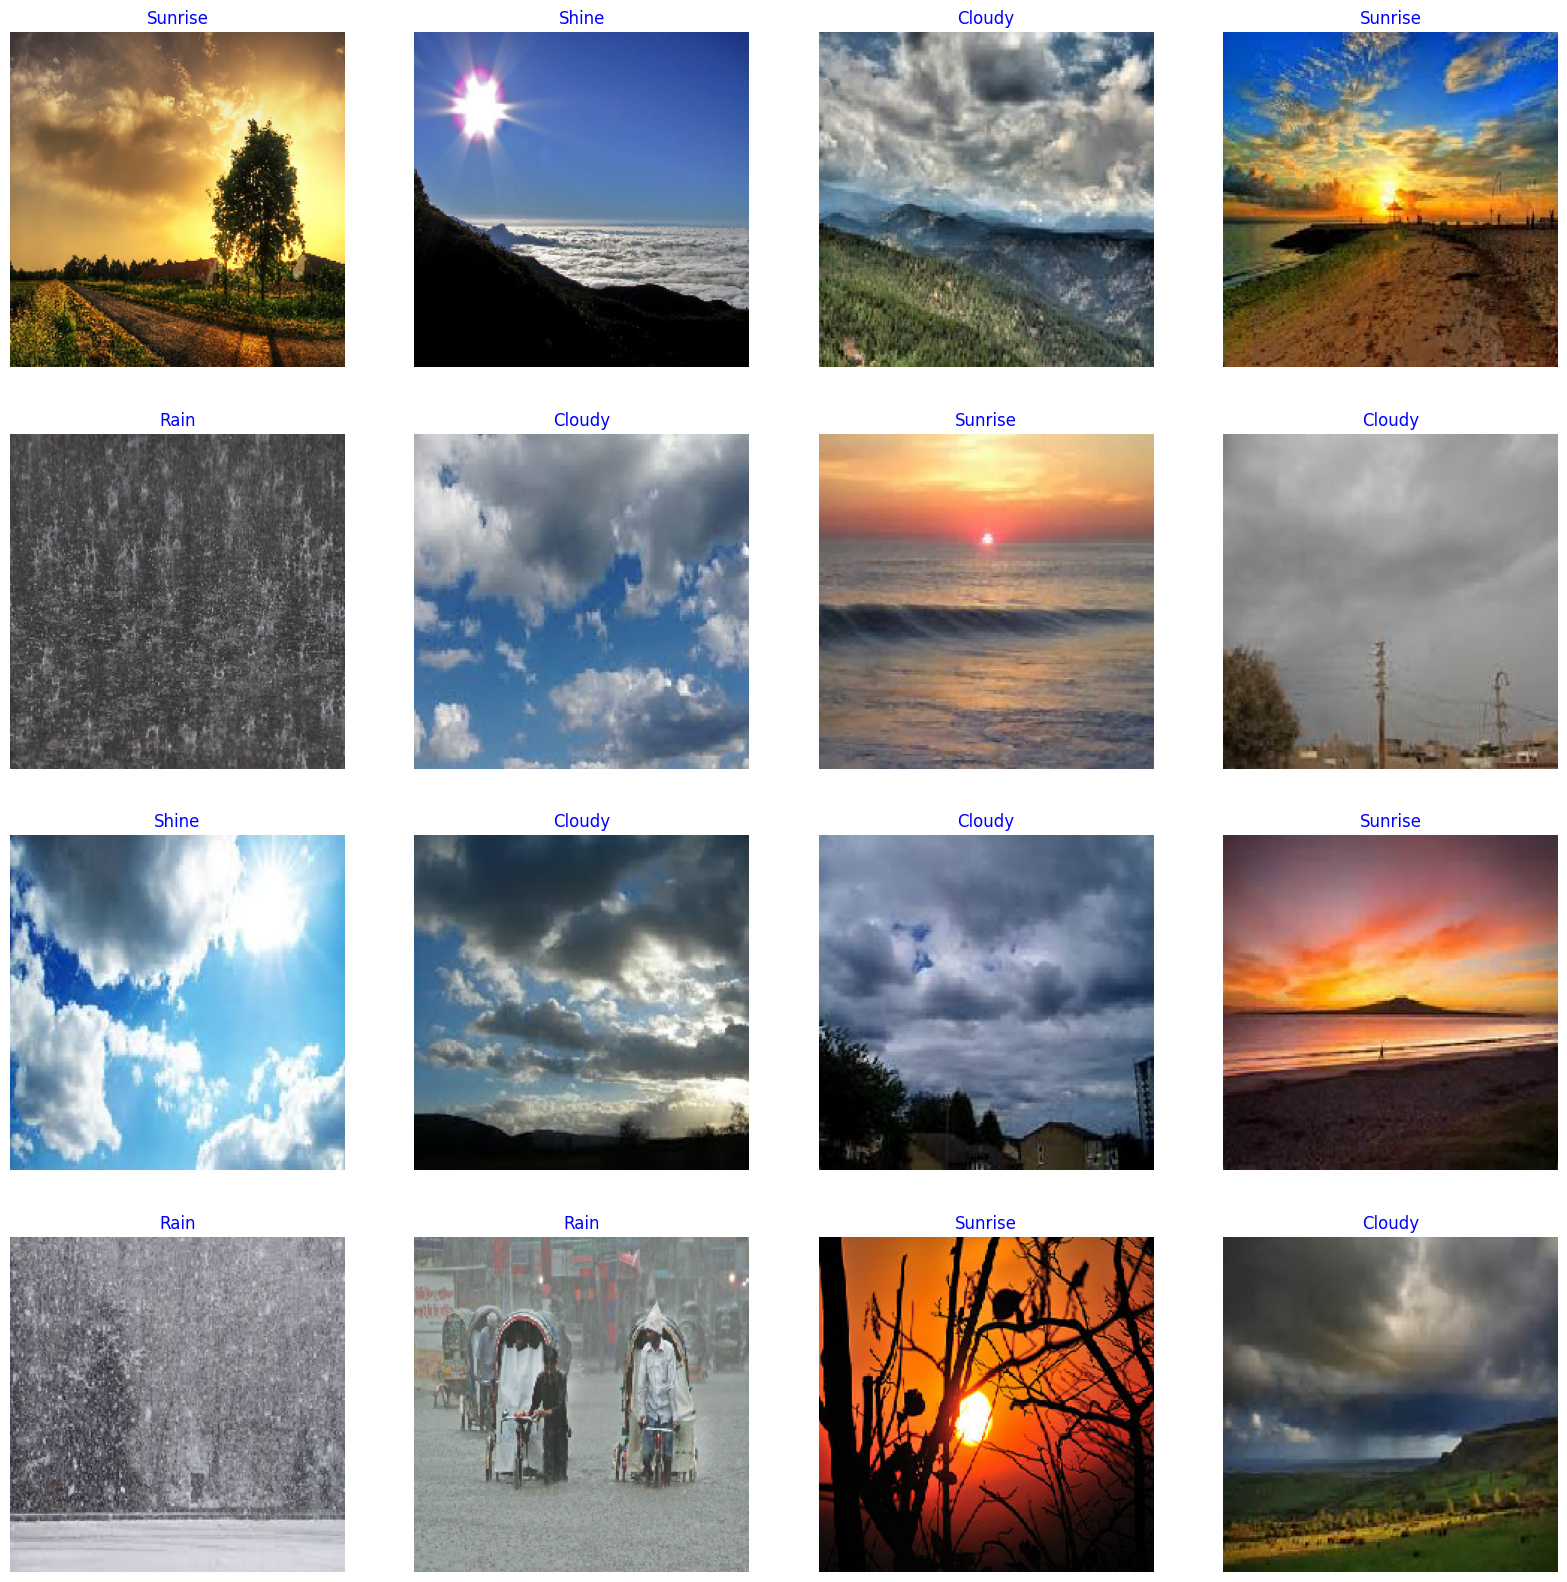

In [10]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)      

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

***Model Structure***

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers

# Define image size and channels
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Get the number of classes from the training generator
class_count = len(list(train_gen.class_indices.keys()))

# Load the base model with pre-trained weights from ImageNet, excluding the top layer
base_model = tf.keras.applications.efficientnet.EfficientNetB3(
    include_top=False, 
    weights="imagenet", 
    input_shape=img_shape, 
    pooling='max'
)

# Define the model architecture
model = Sequential([
    # Add the base model
    base_model,
    # Add batch normalization
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    # Add a dense layer with L2 and L1 regularization
    Dense(256, 
          kernel_regularizer=regularizers.l2(l=0.016), 
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), 
          activation='relu'),
    # Add dropout for regularization
    Dropout(rate=0.45, seed=123),
    # Add the final dense layer with softmax activation for classification
    Dense(class_count, activation='softmax')
])

# Compile the model with Adamax optimizer, categorical crossentropy loss, and various metrics
model.compile(
    Adamax(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Print the model summary
model.summary()


43941136/43941136 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                         

In [12]:
# Define the number of epochs for training
epochs = 25

# Train the model using the training data generator
# - epochs: Number of times to iterate over the training data
# - verbose: Verbosity mode (1 = progress bar)
# - validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch
# - shuffle: Whether to shuffle the order of the batches at the beginning of each epoch
hist = model.fit(train_gen, epochs=epochs, verbose=1, validation_data=valid_gen, shuffle=False)


Epoch 1/25
64/64 [==============================] - 302s 4s/step - loss: 7.9809 - accuracy: 0.7974 - precision: 0.8133 - recall: 0.7747 - auc: 0.9494 - val_loss: 7.3194 - val_accuracy: 0.8772 - val_precision: 0.8929 - val_recall: 0.8772 - val_auc: 0.9839
Epoch 2/25
64/64 [==============================] - 257s 4s/step - loss: 6.6897 - accuracy: 0.9289 - precision: 0.9414 - recall: 0.9209 - auc: 0.9905 - val_loss: 6.2046 - val_accuracy: 0.9123 - val_precision: 0.9123 - val_recall: 0.9123 - val_auc: 0.9950
Epoch 3/25
64/64 [==============================] - 256s 4s/step - loss: 5.7726 - accuracy: 0.9575 - precision: 0.9632 - recall: 0.9565 - auc: 0.9973 - val_loss: 5.4398 - val_accuracy: 0.9474 - val_precision: 0.9643 - val_recall: 0.9474 - val_auc: 0.9983
Epoch 4/25
64/64 [==============================] - 256s 4s/step - loss: 5.0743 - accuracy: 0.9565 - precision: 0.9640 - recall: 0.9516 - auc: 0.9973 - val_loss: 4.8036 - val_accuracy: 0.9649 - val_precision: 0.9643 - val_recall: 0.947

***Display model performance***

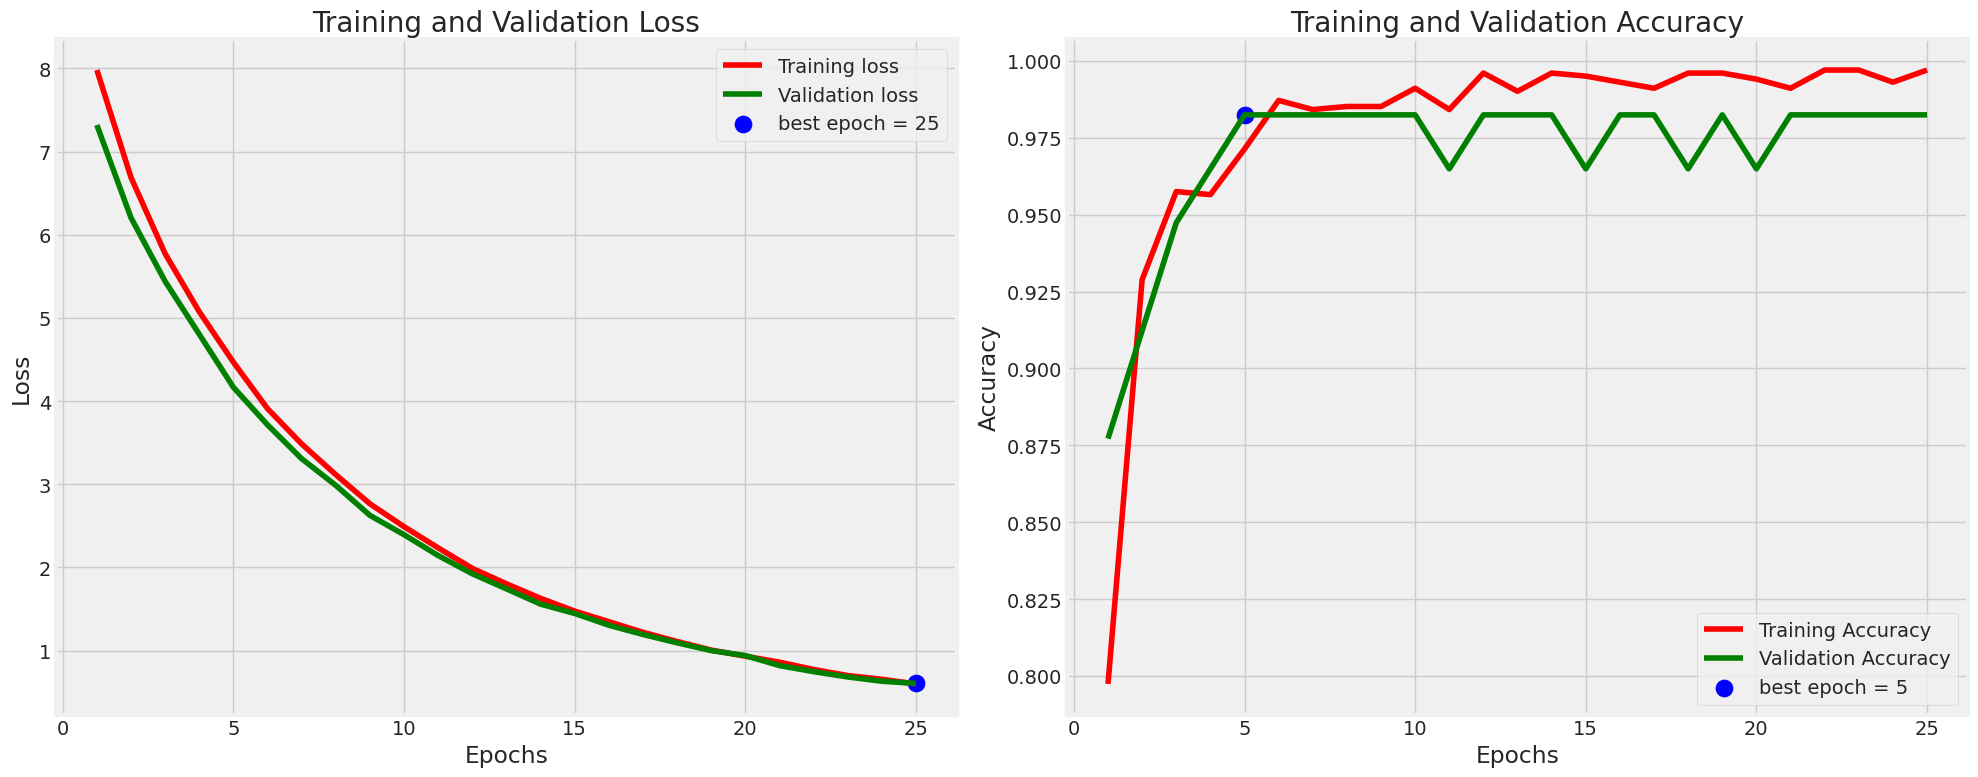

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define needed variables from the training history
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

# Find the index of the epoch with the lowest validation loss
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

# Find the index of the epoch with the highest validation accuracy
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

# Create a list of epoch numbers
Epochs = [i + 1 for i in range(len(tr_acc))]

# Labels for the best epochs
loss_label = f'best epoch = {str(index_loss + 1)}'
acc_label = f'best epoch = {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [14]:
train_score = model.evaluate(train_gen)
valid_score = model.evaluate(valid_gen)
test_score = model.evaluate(test_gen)

4/4 [==============================] - 3s 705ms/step - loss: 0.5617 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000


In [15]:
print('Train Loss : ', train_score[0])
print('Train Accuracy : ', train_score[1])
print('=' * 20)
print( )
print('Valid Loss : ', valid_score[0])
print('Valid Accuracy : ', valid_score[1])
print('=' * 20)
print( )
print('Test Loss : ', test_score[0])
print('Test Accuracy : ', test_score[1])

Train Loss :  0.5366496443748474
Train Accuracy :  1.0

Valid Loss :  0.6046043634414673
Valid Accuracy :  0.9824561476707458

Test Loss :  0.5616954565048218
Test Accuracy :  1.0


#### Get Predictions

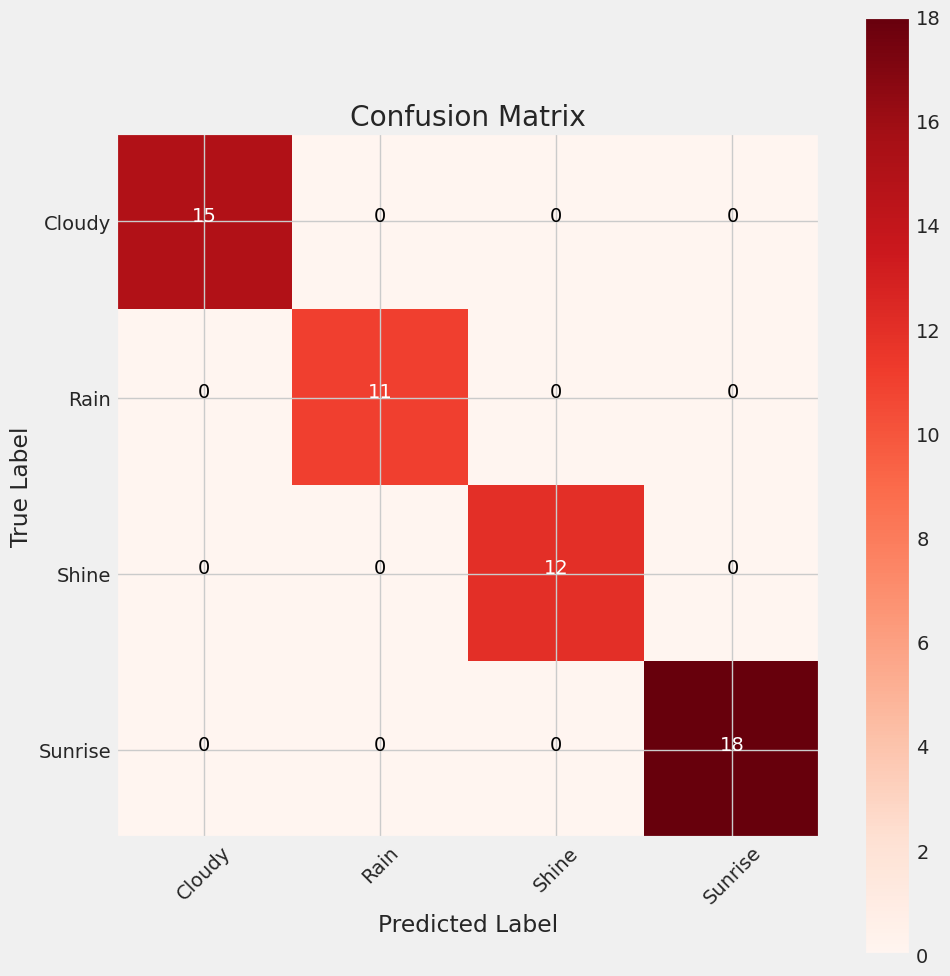

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Predict the labels for the test data using the model
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

# Get the class indices and class names from the test generator
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Compute the confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()

# Set the tick marks and labels for the confusion matrix
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate the confusion matrix with the counts
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

# Adjust layout and add labels
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [17]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [18]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))


              precision    recall  f1-score   support

      Cloudy       1.00      1.00      1.00        15
        Rain       1.00      1.00      1.00        11
       Shine       1.00      1.00      1.00        12
     Sunrise       1.00      1.00      1.00        18

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

